# "kaggle - Geospatial Analysis01"

Create interactive maps, and discover patterns in geospatial data.

# Exercise : Your first map

In [1]:
import geopandas as gpd

#### 1. 데이터 가져오기

In [3]:
#loans_filepath = "C:/Users/Kangdaeyong/Desktop/datamining/kaggle_geospatial_analysis/archive/kiva_loans/kiva_loans/kiva_loans.shp"
loans_filepath = "C:/Users/user/Desktop/강수인/archive/kiva_loans/kiva_loans/kiva_loans.shp"


world_loans = gpd.read_file(loans_filepath)

#### 2. 데이터 플롯 그리기

In [4]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres') # filepath알려주는 함수
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

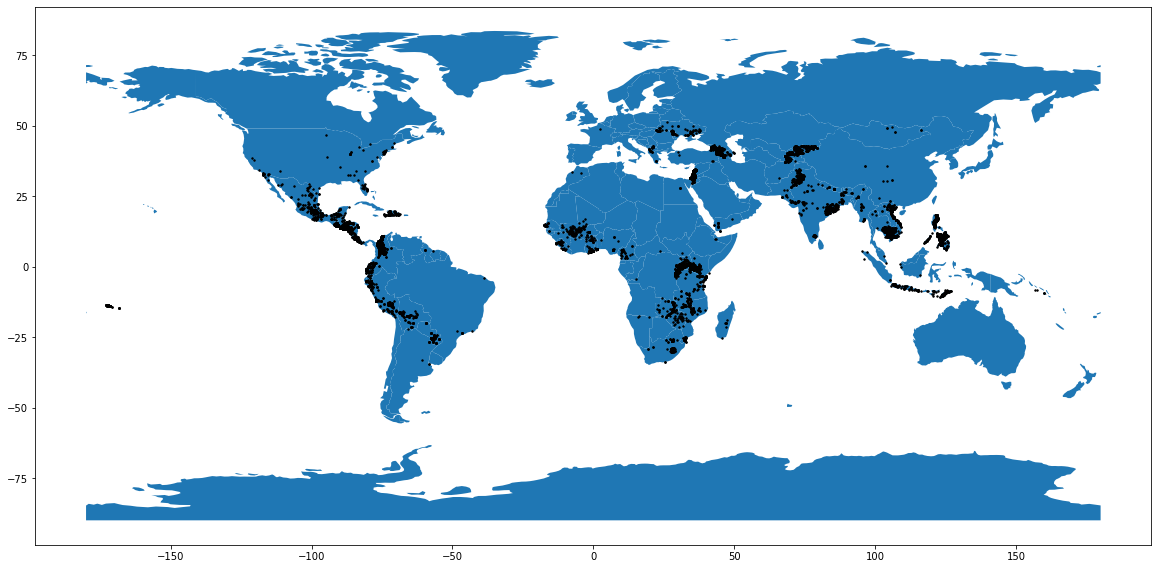

In [5]:
ax = world.plot(figsize=(20,20))
world_loans.plot(ax=ax, markersize=2, color = "black")

#### 3) 필리핀에 기반을 둔 대출 선택하기

In [6]:
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [7]:
world_loans[world_loans['country']=="Philippines"]

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)
...,...,...,...,...,...,...,...
12376,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,11500,POINT (120.83841 14.35197)
12377,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,17050,POINT (120.83841 14.35197)
12378,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,24000,POINT (120.96597 14.62057)
12379,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,31725,POINT (120.96597 14.62057)


In [8]:
# 필리핀(Philippines)만 추출
phl_loans = world_loans[world_loans['country']=="Philippines"]
phl_loans

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)
...,...,...,...,...,...,...,...
12376,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,11500,POINT (120.83841 14.35197)
12377,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,17050,POINT (120.83841 14.35197)
12378,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,24000,POINT (120.96597 14.62057)
12379,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,31725,POINT (120.96597 14.62057)


#### 4. 필리핀에서 대출을 얼마나 받는지 플랏팅해보기

In [9]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
#phl = gpd.read_file("C:/Users/Kangdaeyong/Desktop/datamining/kaggle_geospatial_analysis/archive/Philippines_AL258.kml", driver='KML')
phl = gpd.read_file("C:/Users/user/Desktop/강수인/archive/Philippines_AL258.kml", driver='KML')
#C:/Users/user/Desktop/강수인/archive

phl.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<AxesSubplot:>

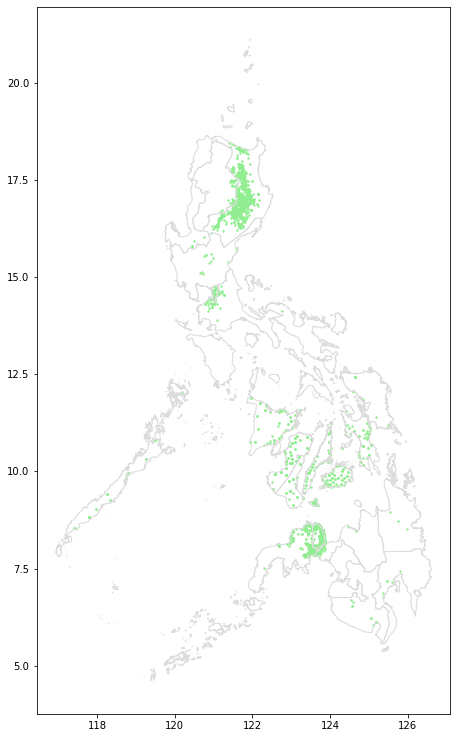

In [10]:
ax = phl.plot(figsize = (13,13), color = 'none', edgecolor = 'gainsboro', zorder=3)

phl_loans.plot(color = 'lightgreen',ax=ax, markersize = 2)

- Autonomous Region in Muslim Mindanao과 Bicol Region, Caraga이 다른 섬에 비해 대출 수가 적은 편이라서 이 지역에서 field partner를 구하면 좋을 것 같다 
- 특히 가장 적은 Autonomous Region in Muslim Mindanao지역을 공략하는 것이 좋을 것으로 예상된다. 
- Cagayan Valley는 많은 편, Calabarzon도 적지 않게 대출받는 것으로 볼 수 있다.